In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\91760\Downloads\housepricedata.csv")
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Converting into array for machine learning process

In [4]:
dataset=df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X=dataset[:,0:10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [7]:
y=dataset[:,10]
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [8]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [10]:
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_scale, y, test_size=0.3,random_state=101)

In [ ]:
print(len(X_train))
print(len(X_test_val))
print(len(y_train))
print(len(y_test_val))

1022
438
1022
438


In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test_val, y_test_val, test_size=0.5)

In [ ]:
print(len(X_val))
print(len(X_test))
print(len(Y_val))
print(len(Y_test))

219
219
219
219


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

The below code states that we use:-

input layer=10,
hidden layer1 = 32,
hidden layer2 = 32,
output layer = 1,

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),     #ANN Design
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])       #deciding parameters

In [ ]:
mdl = model.fit(X_train, y_train,
          batch_size=22, epochs=10,                #training model
          validation_data=(X_val, Y_val),
          callbacks=callbacks.EarlyStopping(monitor="val_loss",
										mode="max", patience=5,
										restore_best_weights=True))

Epoch 1/10
47/47 [==============================] - 1s 10ms/step - loss: 0.0890 - accuracy: 0.8816 - val_loss: 0.1036 - val_accuracy: 0.8721
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 0.8865 - val_loss: 0.1019 - val_accuracy: 0.8676
Epoch 3/10
47/47 [==============================] - 0s 7ms/step - loss: 0.0847 - accuracy: 0.8885 - val_loss: 0.1008 - val_accuracy: 0.8630
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0839 - accuracy: 0.8865 - val_loss: 0.0973 - val_accuracy: 0.8767
Epoch 5/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.8894 - val_loss: 0.0978 - val_accuracy: 0.8676
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0795 - accuracy: 0.8894 - val_loss: 0.0944 - val_accuracy: 0.8858


Sample Testing

In [ ]:
import numpy as np

In [ ]:
test_data=np.array([8450,7,5,856,2,1,3,8,0,548])

In [ ]:
print(model.predict(test_data.reshape(1,10),batch_size=1))    #Using first row of dataframe

1/1 [==============================] - 0s 424ms/step
[[1.]]


Visualization


In [ ]:
import matplotlib.pyplot as plt

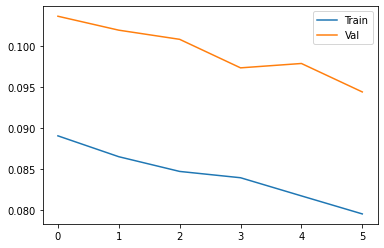

In [ ]:
plt.plot(mdl.history['loss'])
plt.plot(mdl.history['val_loss'])
plt.legend(['Train','Val'])

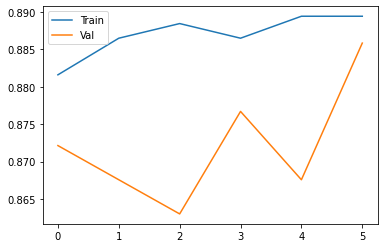

In [ ]:
plt.plot(mdl.history['accuracy'])
plt.plot(mdl.history['val_accuracy'])
plt.legend(['Train','Val'])

Conclusion:-

Hence the above model is not overfit because i have used "Early Stopping" but in case we are not using Early Stopping the model will overfit as a result of which we have to use "Regularization and Dropout" Parameters.